> # **Gradient Descent**
> Gradient descent is an optimization algorithm used to minimize the cost function of a machine learning model. The goal of gradient descent is to find the optimal set of parameters that minimize the cost function.
<br><br>
> Why to use Gradient Descent as we have Ordinary Least Square Foumula for both coef_ and Intercept_ directly 
> - Ordinary Least Square technique is `computionally very complex for higher dimentions (Too many features)`, in that cases we use Gradient Descent

> There are several types of gradient descent algorithms, including:
> - `Batch gradient descent`: This algorithm updates the parameters after processing the entire training dataset.
> - `Stochastic gradient descent`: This algorithm updates the parameters after processing a single training example.
> - `Mini-batch gradient descent`: This algorithm updates the parameters after processing a small batch of training examples.

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

In [2]:
dataframe = load_diabetes(as_frame = True)
df = dataframe['data']
df['target'] = dataframe['target']
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<hr>

> # **Batch Gradient Descent**
> Batch gradient descent computes the gradient of the cost function with respect to the model parameters using the entire training dataset in each iteration.

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [6]:
print(model.coef_, model.intercept_)

[[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
   518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]] [151.34560454]


In [7]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4526027629719196

In [8]:
class batch_gradient_descent:
    def __init__(self, learning_rate = 0.0001, epochs = 100) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train) -> None:
        X_train = np.insert(X_train, 0, 1, axis = 1)
        y_train = np.array(y_train).ravel()
        
        beta = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(X_train, beta)
            
            beta_der = -2 * np.dot(y_train - y_hat, X_train)
            beta = beta - self.lr * beta_der
        
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [9]:
bgd = batch_gradient_descent(0.001, 1000)
bgd.fit(X_train, y_train)
print(bgd.intercept_, bgd.coef_)

151.47836073838656 [  46.89139107 -169.40550196  469.51877893  307.08946236  -50.8393379
  -98.79531632 -209.16133848  146.06817032  350.69317221  131.66039922]


In [10]:
y_pred = bgd.predict(X_test)
r2_score(y_test, y_pred)

0.4591365054390685

> - Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called `Batch Gradient Descent`
> - However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

<hr>

> # **Stocastic Gradient Descent**
> Insteed of updating coef_ and intercept_ after one entire epoch, it get changed after each random row in the dataset, so for each epoch no.of rows times the coef_ and intercept_ get updated.
> - High computational efficiency due to the fact that the gradient can be estimated with a random sample of data points instead of requiring the full dataset
> - Ability to process large datasets and reach convergence quickly (`Out of Core Algorithm`)
<br><br>
> ### Learning Schedule
> A learning schedule adjusts the learning rate over every iteration of epoch to improve the training process. The learning rate is crucial for gradient descent algorithms, as it controls the size of the steps taken towards the minimum of the loss function.

In [11]:
class stocastic_gradient_descent:
    def __init__(self, learning_rate=0.01, epochs=1000) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate  # Initial learning rate
        self.epochs = epochs  # Number of iterations
    
    # Learning Schedule
    def learning_rate(self, t):
        t0, t1 = 5, 50
        return t0 / (t + t1)
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        
        # Add bias term (column of ones) to X_train
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        # Initialize random values for coef and intercept
        beta = np.ones(X_train.shape[1])
        
        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):
                # Random index generator
                idx = np.random.randint(0, X_train.shape[0])
                
                # Setting Learning rate
                lr = self.learning_rate(epoch * X_train.shape[0] + i)
                
                # Compute the prediction
                y_hat = np.dot(X_train[idx], beta)
                
                # Compute the gradient
                gradient = -2 * (y_train[idx] - y_hat) * X_train[idx]
                
                # Update beta (including the intercept term)
                beta -= lr * gradient
        
        # Extract the intercept and coefficients
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]
    
    def predict(self, X_test):
        X_test = np.array(X_test)
        return self.intercept_ + np.dot(X_test, self.coef_)

In [17]:
sgd = stocastic_gradient_descent(0.01, 500)
sgd.fit(X_train, y_train)
print(sgd.coef_, sgd.intercept_, sep = '\n')

[ 52.44090537  -4.62747784 149.07628381 108.12723214  27.27199614
  17.54379226 -90.60015771  90.80246621 127.47171727  90.33489758]
152.6016847326119


In [18]:
y_pred = sgd.predict(X_test)
r2_score(y_test, y_pred)

0.3129471258798553

> ### Feature Scaling - `StandardScaler`
> 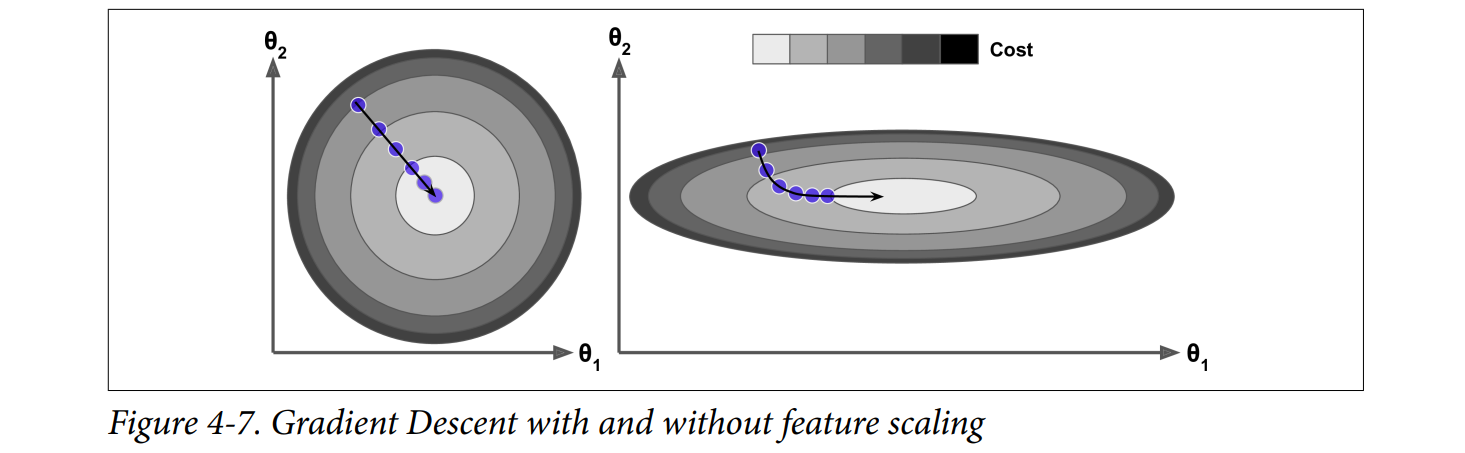<br><br>
> In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if
the features have very different scales. Figure 4-7 shows Gradient Descent on a train‐
ing set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right).

In [23]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

sgd = stocastic_gradient_descent(0.01, 200)
sgd.fit(X_train_sc, y_train)
print(sgd.coef_, sgd.intercept_, sep = '\n')

[  1.75200184 -11.02422249  26.53895047  16.67133117 -16.9239458
   2.88049131  -4.31221963   9.14862164  24.79800685   3.4943486 ]
154.30884424173757


In [24]:
r2_score(y_test, sgd.predict(X_test_sc))

0.4555670030452821

> ### sk-learn : `SGDRegressor`
- Check the hyperparameters

In [29]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.0001,
    max_iter=50000,
    eta0=0.01,
    tol=0.001,
    random_state=42,
    n_iter_no_change=200
)

model.fit(X_train, np.array(y_train).ravel())

SGDRegressor(max_iter=50000, n_iter_no_change=200, random_state=42)

In [30]:
print(model.coef_, model.intercept_)

[  41.63137492 -226.62353538  536.22443103  332.52936198  -99.83557697
 -114.65201926 -207.92779331  150.01584801  405.78084321   69.88627523] [151.35676085]


In [31]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.45831559802090927

> The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (`SGD can be implemented as an out-of-core algorithm.`)
<br><br>
When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so `Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.` Therefore randomness is good to escape from local optima, but bad because it means that the `algorithm can never settle at the minimum (Solution - Learning Schedule)`



<hr>

> # **Mini Batch Gradient Descent**
> Mini-batch gradient descent is a type of stochastic gradient descent that uses a small subset of the training dataset, known as a mini-batch, to update the model’s parameters. This approach combines the advantages of batch gradient descent and stochastic gradient descent.
<br><br>
> - It is `more efficient than batch gradient descent`, as it only requires computing the gradient for a small subset of the training data.
> - It is `more robust than stochastic gradient descent`, as it reduces the noise associated with updating the model’s parameters based on a single data point.
> - It can trade off convergence speed and computation efficiency, making it a more flexible and robust algorithm.

In [32]:
class gradient_descent:
    def __init__(self, batch_size, learning_rate, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.batch_size = batch_size
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()
        
        X_train = np.insert(X_train, 0, 1, axis = 1)

        # Initilizing random values of coef and intercept, generally
        beta = np.ones(X_train.shape[1])

        for i in range(self.epochs): 
            # batch wise looping
            for j in range(int(X_train.shape[0]/self.batch_size)):
                # Generating random set of indices - from random module
                idx = random.sample(range(X_train.shape[0]), self.batch_size)

                # Using fancy indexing
                y_hat = np.dot(X_train[idx], beta)

                beta_der = (-2 / X_train.shape[0]) * np.dot(y_train[idx] - y_hat, X_train[idx])
                beta = beta - (self.lr * beta_der)
        
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

In [72]:
mbgd = gradient_descent(200, 0.1, 4000)
mbgd.fit(X_train, y_train)

In [73]:
print(mbgd.coef_, mbgd.intercept_)

[  54.05156372 -118.97303188  404.95022124  272.28064297  -18.39253514
  -60.26606009 -193.02996206  148.6956484   311.26773524  146.51450929] 152.47877710306102


In [74]:
y_pred = mbgd.predict(X_test)
r2_score(y_test, y_pred)

0.45495063374047107

> ### Feature Scaling - `StandardScaler`

In [82]:
mbgd = gradient_descent(100, 0.1, 7000)
mbgd.fit(X_train_sc, y_train)
y_pred = mbgd.predict(X_test_sc)
r2_score(y_test, y_pred) # Highest till now

0.45933293953938303

> ## Behavour of Types of Gradient Descent
> - Batch Gradient Descent
>     - Computational Cost: High, as it processes the entire dataset.
>     - Convergence: Slow, because it may take many epochs to see meaningful changes.
>     - Stability: Stable, with consistent updates.
>     - Use Case: Suitable for smaller datasets or when high computational resources are available.
> - Stocastic Gradient Descent
>     - Computational Cost: Low, since it updates weights after each sample.
>     - Convergence: Fast, but with high variance; might not always converge to the best solution.
>     - Stability: Less stable; the path to the optimal solution can be noisy.
>     - Use Case: Best for online learning or very large datasets where the full dataset can't fit into memory.
> - Mini Batch Gradient Descent
>     - Computational Cost: Moderate; processes subsets of data.
>     - Convergence: Balanced speed; combines benefits of Batch and SGD.
>     - Stability: More stable than SGD but less stable than Batch Gradient Descent.
>     - Use Case: Commonly used for large datasets where a balance of speed and accuracy is needed.

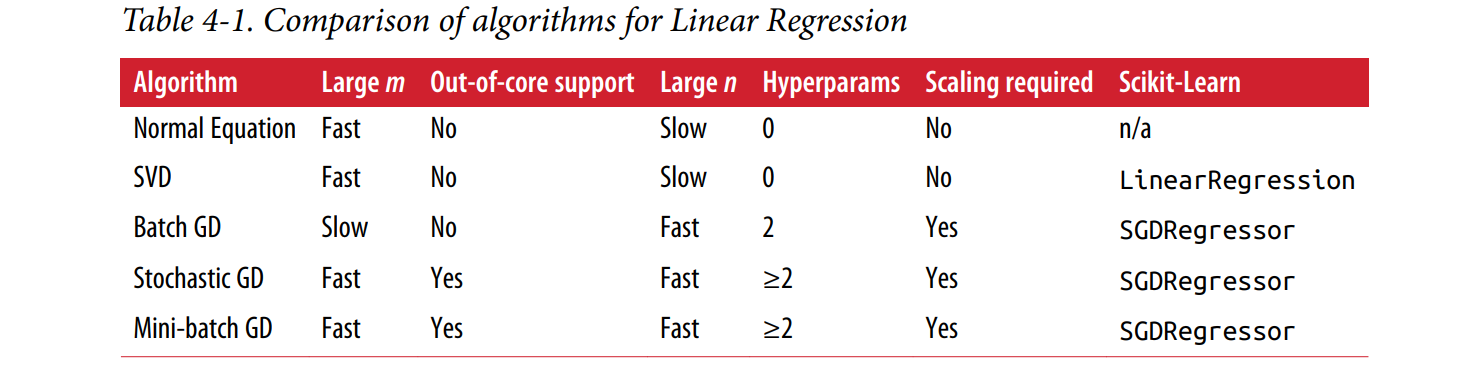

> ### Effect of No. Epochs
> - The number of epochs is a hyperparameter that controls how many times the model will pass through the entire training set.
> - Common choices: 1000, 5000, or 10,000, but it depends on the complexity of the problem. Start with 1000 and increase if necessary.
> - `Too few epochs might result in underfitting, while too many might cause overfitting.`
> 
> ### Effect of Learning_rate
> - The learning rate determines the step size during gradient updates.
> - Common choices: 0.01, 0.1, 0.001, etc.
> - `A learning rate that is too high might cause divergence, while a learning rate that is too low might lead to very slow convergence.`